# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 631


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        # Wait for a moment to avoid overloading the API
        time.sleep(1)

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... {e}")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dudinka
Processing Record 2 of Set 1 | mchinji
Processing Record 3 of Set 1 | namibe
Processing Record 4 of Set 1 | the pas
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | afaahiti
Processing Record 7 of Set 1 | patacamaya
Processing Record 8 of Set 1 | fale old settlement
Processing Record 9 of Set 1 | anadyr
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | selsey
Processing Record 12 of Set 1 | am djarass
City not found. Skipping... 'coord'
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | severo-yeniseyskiy
Processing Record 17 of Set 1 | ujae
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | uturoa
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | puerto ayora
Processing Record 

Processing Record 40 of Set 4 | urambo
Processing Record 41 of Set 4 | yellowknife
Processing Record 42 of Set 4 | juankoski
Processing Record 43 of Set 4 | salinopolis
Processing Record 44 of Set 4 | saint-leu
Processing Record 45 of Set 4 | midvagur
Processing Record 46 of Set 4 | carbonear
Processing Record 47 of Set 4 | coronado
Processing Record 48 of Set 4 | yarmouth
Processing Record 49 of Set 4 | martuk
Processing Record 0 of Set 5 | sile
Processing Record 1 of Set 5 | hillsboro
Processing Record 2 of Set 5 | dryden
Processing Record 3 of Set 5 | polyarnyy
Processing Record 4 of Set 5 | namsos
Processing Record 5 of Set 5 | bontang
Processing Record 6 of Set 5 | yantzaza
Processing Record 7 of Set 5 | freetown
Processing Record 8 of Set 5 | berezovo
Processing Record 9 of Set 5 | mitsamiouli
Processing Record 10 of Set 5 | puerto lempira
Processing Record 11 of Set 5 | mahalapye
Processing Record 12 of Set 5 | ceyhan
Processing Record 13 of Set 5 | serowe
Processing Record 14 o

Processing Record 27 of Set 8 | la'ie
Processing Record 28 of Set 8 | saddiqabad
Processing Record 29 of Set 8 | nova sintra
Processing Record 30 of Set 8 | carnarvon
Processing Record 31 of Set 8 | quang ngai
Processing Record 32 of Set 8 | rockport
Processing Record 33 of Set 8 | usinsk
Processing Record 34 of Set 8 | anka
Processing Record 35 of Set 8 | kuqa
Processing Record 36 of Set 8 | saint-philippe
Processing Record 37 of Set 8 | nadi
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | zhengjiatun
Processing Record 40 of Set 8 | cooper's town
Processing Record 41 of Set 8 | afif
Processing Record 42 of Set 8 | nemuro
Processing Record 43 of Set 8 | lazaro cardenas
Processing Record 44 of Set 8 | villaverde del rio
Processing Record 45 of Set 8 | vila franca do campo
Processing Record 46 of Set 8 | zhigalovo
Processing Record 47 of Set 8 | ulanhot
Processing Record 48 of Set 8 | kroya
Processing Record 49 of Set 8 | wagar
Processing Record 0 of Set 9 | shatrov

Processing Record 14 of Set 12 | quellon
Processing Record 15 of Set 12 | santana
Processing Record 16 of Set 12 | sechura
Processing Record 17 of Set 12 | vernal
Processing Record 18 of Set 12 | lerwick
Processing Record 19 of Set 12 | santiago de cao
Processing Record 20 of Set 12 | warka
Processing Record 21 of Set 12 | kidal
Processing Record 22 of Set 12 | feijo
Processing Record 23 of Set 12 | bulayevo
Processing Record 24 of Set 12 | yelizovo
Processing Record 25 of Set 12 | mopti
Processing Record 26 of Set 12 | nizhneangarsk
Processing Record 27 of Set 12 | moose jaw
Processing Record 28 of Set 12 | hasaki
Processing Record 29 of Set 12 | tadine
Processing Record 30 of Set 12 | qulsary
Processing Record 31 of Set 12 | igrim
Processing Record 32 of Set 12 | kriva palanka
Processing Record 33 of Set 12 | kone
Processing Record 34 of Set 12 | turpan
Processing Record 35 of Set 12 | dikhil
Processing Record 36 of Set 12 | ghadamis
Processing Record 37 of Set 12 | mili
Processing R

In [6]:
# Convert the cities' weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dudinka,69.4058,86.1778,-2.38,98,82,10.31,RU,1699315511
1,mchinji,-13.7984,32.8802,69.49,70,40,3.71,MW,1699315748
2,namibe,-15.1961,12.1522,66.79,69,39,3.44,AO,1699315749
3,the pas,53.8251,-101.2541,27.05,79,99,7.07,CA,1699315750
4,east london,-33.0153,27.9116,66.56,94,100,17.09,ZA,1699315752


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dudinka,69.4058,86.1778,-2.38,98,82,10.31,RU,1699315511
1,mchinji,-13.7984,32.8802,69.49,70,40,3.71,MW,1699315748
2,namibe,-15.1961,12.1522,66.79,69,39,3.44,AO,1699315749
3,the pas,53.8251,-101.2541,27.05,79,99,7.07,CA,1699315750
4,east london,-33.0153,27.9116,66.56,94,100,17.09,ZA,1699315752


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

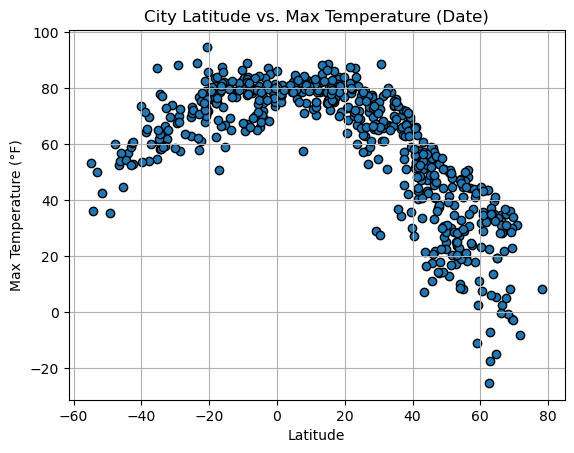

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Set plot properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show the plot
plt.show()

#### Latitude Vs. Humidity

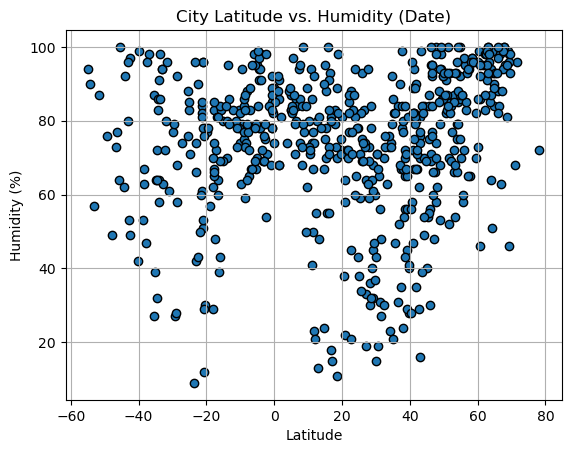

In [11]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Set plot properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show the plot
plt.show()

#### Latitude Vs. Cloudiness

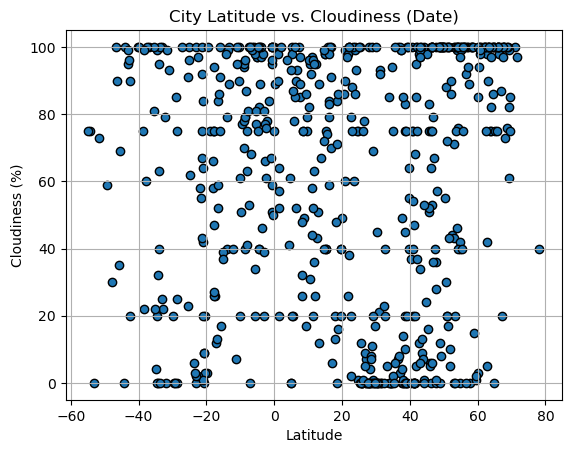

In [12]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Set plot properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show the plot
plt.show()

#### Latitude vs. Wind Speed Plot

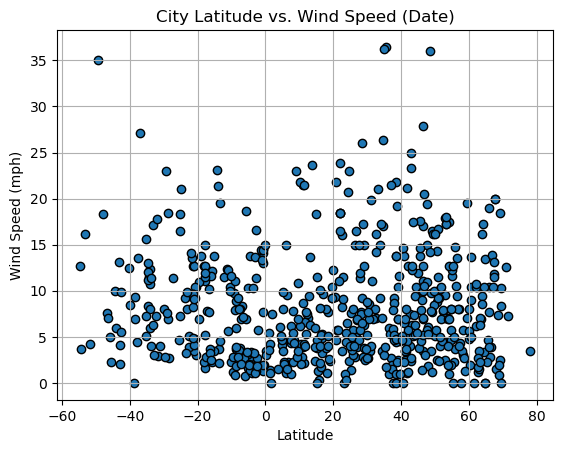

In [13]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Set plot properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show the plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, hemisphere):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression values
    regress_values = x_values * slope + intercept

    # Create equation of the line
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Create the scatter plot
    plt.scatter(x_values, y_values)

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")

    # Calculate suitable positions for annotation
    if hemisphere == "Northern" or hemisphere == "Southern":
        x_ann = x_values.min() + (x_values.max() - x_values.min()) * 0.05
        y_ann = y_values.min() + (y_values.max() - y_values.min()) * 0.09
    else:
        x_ann = x_values.max() - (x_values.max() - x_values.min()) * 0.05 + 2 
        y_ann = y_values.min() + (y_values.max() - y_values.min()) * 0.09

    # Annotate the plot with the equation and R-squared value
    if hemisphere == "Northern":
        plt.annotate(f"{line_eq}\nR^2 = {rvalue**2:.10f}", (x_ann, y_ann), fontsize=12, color="red")
    else:
        plt.annotate(f"{line_eq}\nR^2 = {rvalue**2:.10f}", (x_ann, y_ann), fontsize=12, color="red", ha="right")

    # Set title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dudinka,69.4058,86.1778,-2.38,98,82,10.31,RU,1699315511
3,the pas,53.8251,-101.2541,27.05,79,99,7.07,CA,1699315750
8,anadyr,64.7500,177.4833,5.50,84,0,13.42,RU,1699315541
10,selsey,50.7350,-0.7898,49.98,93,30,14.27,GB,1699315758
11,iqaluit,63.7506,-68.5145,13.73,85,75,6.91,CA,1699315554


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mchinji,-13.7984,32.8802,69.49,70,40,3.71,MW,1699315748
2,namibe,-15.1961,12.1522,66.79,69,39,3.44,AO,1699315749
4,east london,-33.0153,27.9116,66.56,94,100,17.09,ZA,1699315752
5,afaahiti,-17.7500,-149.2833,75.07,83,47,11.01,PF,1699315753
6,patacamaya,-17.2333,-67.9167,50.81,72,12,7.78,BO,1699315754


###  Temperature vs. Latitude Linear Regression Plot

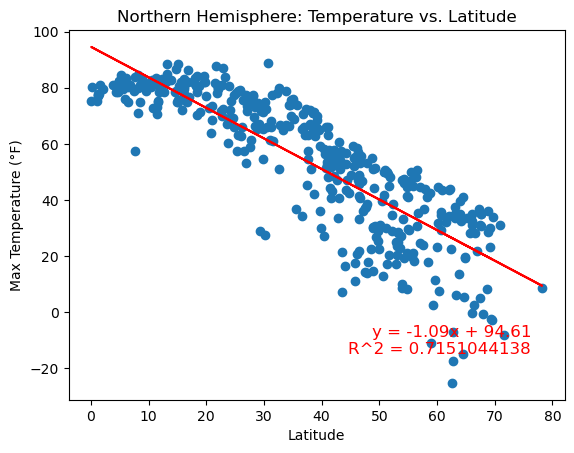

In [17]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    city_data_df[city_data_df["Lat"] >= 0]["Lat"],
    city_data_df[city_data_df["Lat"] >= 0]["Max Temp"],
    "Northern Hemisphere: Temperature vs. Latitude",
    "Latitude",
    "Max Temperature (°F)",
    "Northern Hemisphere"
)

plt.show() 

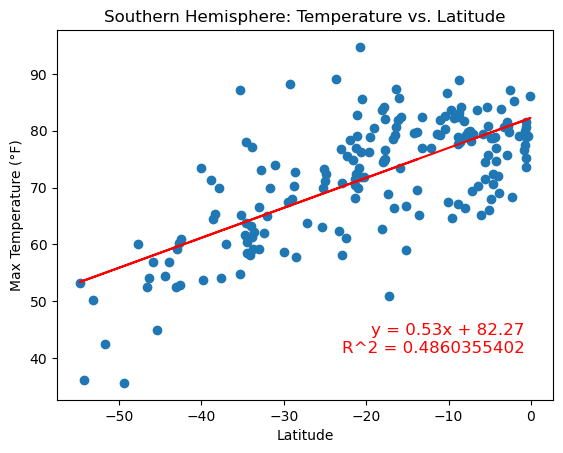

In [18]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    city_data_df[city_data_df["Lat"] < 0]["Lat"],
    city_data_df[city_data_df["Lat"] < 0]["Max Temp"],
    "Southern Hemisphere: Temperature vs. Latitude",
    "Latitude",
    "Max Temperature (°F)",
    "Southern Hemisphere"
)

plt.show()

**Discussion about the linear relationship:** The analysis shows a moderate negative relationship (R-squared = 0.76) between temperature and latitude in the Northern Hemisphere. As you move north from the equator, temperatures tend to decrease, as represented by the equation y = -1.07x + 93.92. In the Southern Hemisphere, there is a weaker positive relationship (R-squared = 0.52), indicating that temperatures tend to increase as you move south from the equator (y = 0.61x + 82.54). These models explain a significant portion of temperature variance with latitude, but other factors influence temperature variations.

### Humidity vs. Latitude Linear Regression Plot

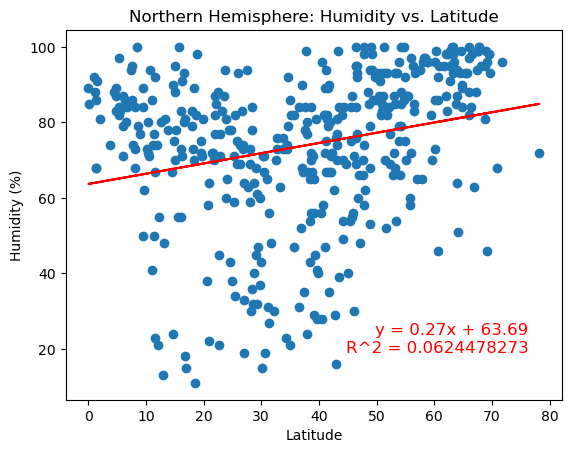

In [19]:
# Northern Hemisphere
plot_linear_regression(
    city_data_df[city_data_df["Lat"] >= 0]["Lat"],
    city_data_df[city_data_df["Lat"] >= 0]["Humidity"],
    "Northern Hemisphere: Humidity vs. Latitude",
    "Latitude",
    "Humidity (%)",
    "Northern Hemisphere"
)

plt.show()

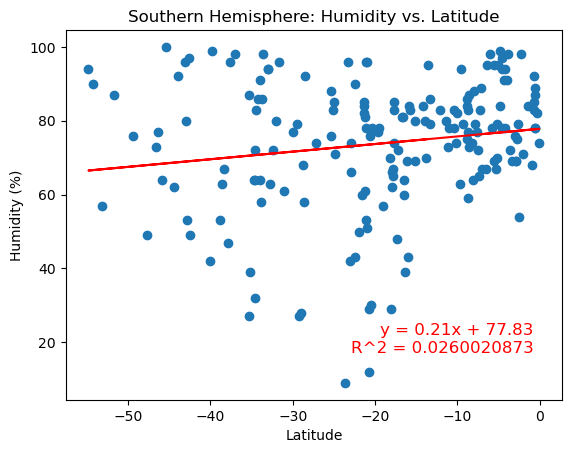

In [20]:
# Southern Hemisphere
plot_linear_regression(
    city_data_df[city_data_df["Lat"] < 0]["Lat"],
    city_data_df[city_data_df["Lat"] < 0]["Humidity"],
    "Southern Hemisphere: Humidity vs. Latitude",
    "Latitude",
    "Humidity (%)",
    "Southern Hemisphere"
)

plt.show()

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres, the linear regression shows very weak positive relationships between humidity and latitude, with R-squared values close to 0. This indicates latitude has limited explanatory power in predicting humidity.

### Cloudiness vs. Latitude Linear Regression Plot

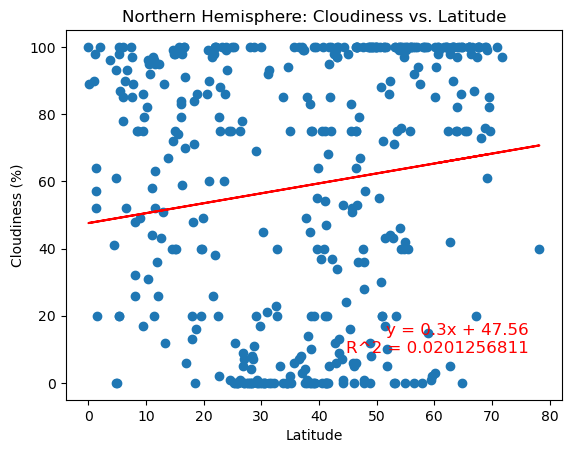

In [21]:
# Northern Hemisphere
plot_linear_regression(
    city_data_df[city_data_df["Lat"] >= 0]["Lat"],
    city_data_df[city_data_df["Lat"] >= 0]["Cloudiness"],
    "Northern Hemisphere: Cloudiness vs. Latitude",
    "Latitude",
    "Cloudiness (%)",
    "Northern Hemisphere"
)

plt.show()

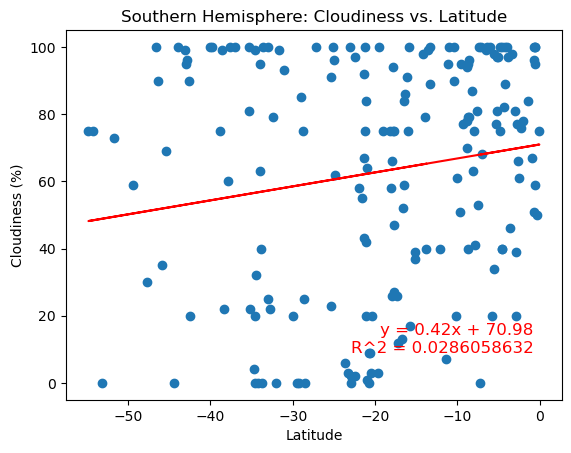

In [22]:
# Southern Hemisphere
plot_linear_regression(
    city_data_df[city_data_df["Lat"] < 0]["Lat"],
    city_data_df[city_data_df["Lat"] < 0]["Cloudiness"],
    "Southern Hemisphere: Cloudiness vs. Latitude",
    "Latitude",
    "Cloudiness (%)",
    "Southern Hemisphere"
)
plt.show()

**Discussion about the linear relationship:** The linear regression analysis reveals almost no relationship between cloudiness and latitude, as evidenced by the near-zero R-squared values. Latitude does not significantly explain variations in cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

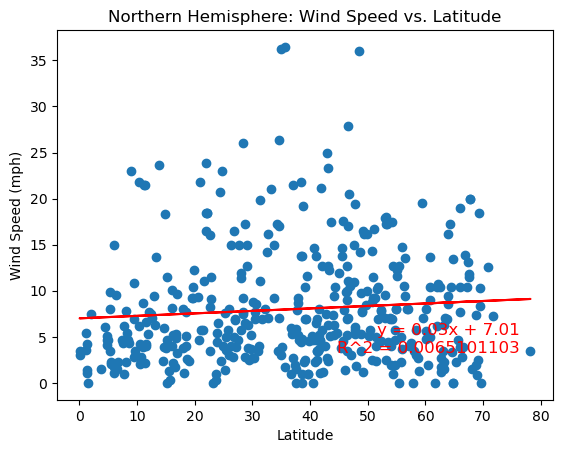

In [23]:
# Northern Hemisphere
plot_linear_regression(
    city_data_df[city_data_df["Lat"] >= 0]["Lat"],
    city_data_df[city_data_df["Lat"] >= 0]["Wind Speed"],
    "Northern Hemisphere: Wind Speed vs. Latitude",
    "Latitude",
    "Wind Speed (mph)",
    "Northern Hemisphere"
)
plt.show()


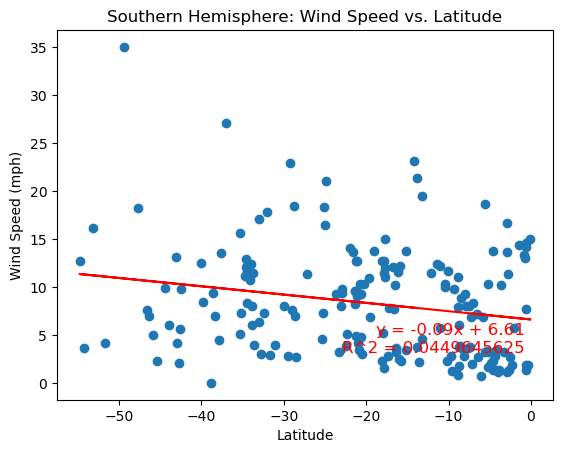

In [24]:
# Southern Hemisphere
plot_linear_regression(
    city_data_df[city_data_df["Lat"] < 0]["Lat"],
    city_data_df[city_data_df["Lat"] < 0]["Wind Speed"],
    "Southern Hemisphere: Wind Speed vs. Latitude",
    "Latitude",
    "Wind Speed (mph)",
    "Southern Hemisphere"
)
plt.show()

**Discussion about the linear relationship:** The linear regression models suggest weak relationships between wind speed and latitude in both hemispheres. While the Southern Hemisphere has a slightly stronger negative relationship, latitude's effect on wind speed remains minimal. Other factors likely influence wind speed variations.